*Prepared by*

*Asif Newaz*

*Lecturer, EEE, IUT*


Course Files: https://github.com/newaz-aa/Hands-on-Machine-Learning-with-Python

Course Outline: https://www.asifnewaz.com/teaching/hands-on-ml-with-python

In the last lab, you have learned how to build a Machine Learning model. You have seen the general ML pipeline, from EDA to data preprocessing and finally training and testing your model.

In this lab, we will dive a little bit deeper; especially into training and testing of the model. You will mainly discuss four topics:



1.   Validation Schemes
2. Performance measures
3.   Cost-sensitive learning
4.   Hyperparameter tuning
5. Feature Selection


# Importing libraries and data

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from imblearn.metrics import *
from sklearn.impute import *

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

**Pima Indians Diabetes Database**

link - https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


In [3]:
data= pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The dataset has 768 instances and 9 attributes. All patients here are females. The objective is to predict whether or not a patient has diabetes.

In [79]:
y=data['Outcome']
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [80]:
x= data.drop(['Outcome'],axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# Preprocessing

**1. Categorical feature** - Data does not have any string or categorical attributes. No such processing required.

**2. Check imbalance ratio (IR)** : If IR is high (>3), other processing (e.g. data resampling, cost-sensitive learning) is required to address the imbalance. Otherwise, classification performance can become biased.

In [6]:
y.value_counts()

,count
Outcome,
0,500
1,268


**3. Check missing entries**

In [7]:
x.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


**4. Check feature importance**

 correlation analysis

In [8]:
co= data.corr()
co

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

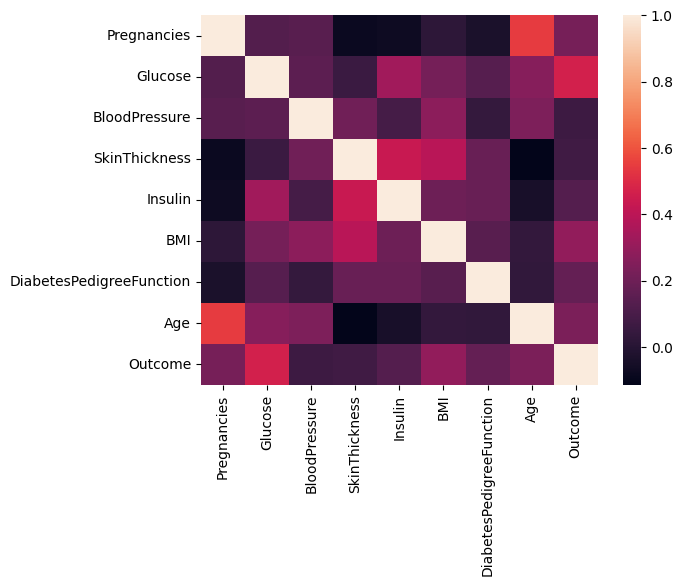

In [9]:
sns.heatmap(co)

Does not have any duplicate or redundant features.

# Training Classifiers

## Validation scheme

*   Large dataset (e.g. Image data) - train-test split
*   Small dataset (structured data) - cross validation (CV)
*   Very large dataset (structured data) - repeat 3 times

=> depending on dataset size and other issues like imbalance ratio, you may use different CV schemes (will be discussed in detail in class).

* Small dataset -> cross-validation (cv)
* small imbalance -> stratified cv
* good number of minority class instances -> 10 fold
* small number of minority class instances -> 5 fold

* best practice -> repeated stratified CV (5 repeats, 10 fold)

## Training

In [11]:
from sklearn.pipeline import Pipeline

Put all steps inside the pipeline - it'll divide the data internally into training and testing folds; perform operations (scaling, sampling, etc.) only on the training set and measure performance on the test set.

In [18]:
knn= KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
lr = LogisticRegression()
dt= DecisionTreeClassifier(random_state=10)
svc = SVC(random_state=10)
nb = GaussianNB()
rf = RandomForestClassifier(random_state=10, n_jobs= -1)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [13]:
sk = StratifiedKFold(shuffle = True, random_state = 100, n_splits= 10)

In [14]:
pipe = Pipeline([('scaler', StandardScaler()), ('lr', lr)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1)

df= pd.DataFrame(result)
df

,fit_time,score_time,test_score
0,0.031972,0.008756,0.727273
1,0.013928,0.004621,0.727273
2,0.054995,0.004393,0.779221
3,0.042239,0.014275,0.675325
4,0.031302,0.017353,0.779221
5,0.031688,0.009127,0.870130
6,0.036054,0.003607,0.818182
7,0.052833,0.008946,0.792208
8,0.025371,0.014279,0.736842
9,0.020631,0.012015,0.815789


In [15]:
df.mean()

,0
fit_time,0.034101
score_time,0.009737
test_score,0.772146


In [17]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', knn)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1)

df= pd.DataFrame(result)
df.mean()

,0
fit_time,0.035969
score_time,0.067758
test_score,0.750000


In [19]:
pipe = Pipeline([('scaler', StandardScaler()), ('rf', rf)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1)

df= pd.DataFrame(result)
df.mean()

,0
fit_time,0.533153
score_time,0.041737
test_score,0.759159


# Performance Measures

So far, we have only used accuracy as our metric. However, accuracy does not portray the entire performance spectrum. For instance, what is the accuracy rate for positive patients? How accurate the model was in correctly predicting diabetes?

To get answers to these questions, there are other metrics that need to be considered. These metrics are defined using the confusion matrix. The image below represents such measures.

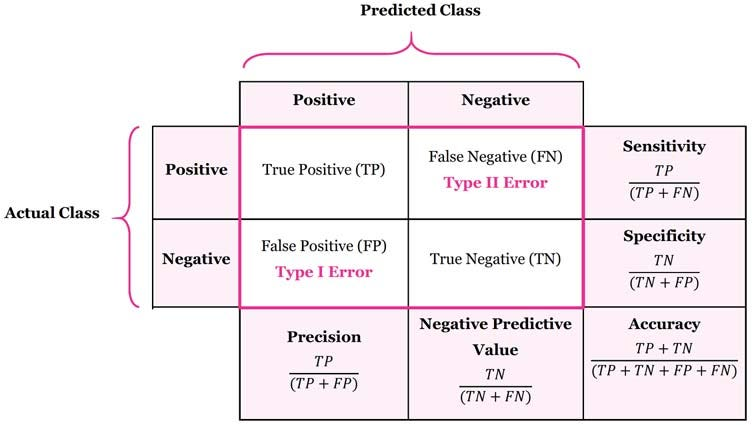

For classification and regression problems, there are separate performance measures. Details will be discussed in your class.

You can get more idea from these medium articles: https://medium.com/analytics-vidhya/complete-guide-to-machine-learning-evaluation-metrics-615c2864d916

For classification -


*   Sensitivity/ Recall/ TPR
*   Specificity/ TNR
*   Precision
*   PPV
*   NPV

Compound metrics (more robust measure of performance) -



*   Balanced accuracy
*   Geometric mean
*   F-score
*   MCC
*   ROC-AUC


In [20]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),    # is available in imblearn library, not in sklearn
        'roc': make_scorer(roc_auc_score),
        'mcc': make_scorer(matthews_corrcoef)
        }

Use cross_validate for validation when u want multiple performance measures.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html



In [81]:
pipe = Pipeline([('scaler', StandardScaler()), ('lr', lr)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(result)
df

,fit_time,score_time,test_accuracy,test_recall,test_specificity,test_gmean,test_roc,test_mcc
0,0.018293,0.026415,0.727273,0.518519,0.84,0.659966,0.679259,0.378692
1,0.014288,0.025356,0.727273,0.481481,0.86,0.643486,0.670741,0.371605
2,0.012378,0.049611,0.779221,0.518519,0.92,0.690679,0.719259,0.494416
3,0.013977,0.029534,0.675325,0.481481,0.78,0.612826,0.630741,0.269379
4,0.016935,0.023633,0.779221,0.481481,0.94,0.672750,0.710741,0.495702
5,0.011949,0.026372,0.870130,0.703704,0.96,0.821922,0.831852,0.711111
6,0.017332,0.022484,0.818182,0.629630,0.92,0.761091,0.774815,0.588889
7,0.012498,0.022976,0.792208,0.629630,0.88,0.744362,0.754815,0.531326
8,0.013167,0.022495,0.736842,0.538462,0.84,0.672538,0.689231,0.395900
9,0.012412,0.024113,0.815789,0.692308,0.88,0.780532,0.786154,0.584109


In [82]:
df.mean(axis=0)

,0
fit_time,0.014323
score_time,0.027299
test_accuracy,0.772146
test_recall,0.567521
test_specificity,0.882000
test_gmean,0.706015
test_roc,0.724761
test_mcc,0.482113


In [68]:
df.mean(axis=0).values.tolist()

[0.014184784889221192,
 0.022740840911865234,
 0.7721462747778537,
 0.5675213675213675,
 0.882,
 0.7060151616138552,
 0.7247606837606837,
 0.48211283595306087]

In [83]:
result = pd.DataFrame({'Metric': ['fit_time', 'score_time', 'test_accuracy', 'test_recall',
                             'test_specificity', 'test_gmean', 'test_roc', 'test_mcc']})
result

,Metric
0,fit_time
1,score_time
2,test_accuracy
3,test_recall
4,test_specificity
5,test_gmean
6,test_roc
7,test_mcc


In [84]:
result['LR']= df.mean(axis=0).values.tolist()
result

,Metric,LR
0,fit_time,0.014323
1,score_time,0.027299
2,test_accuracy,0.772146
3,test_recall,0.567521
4,test_specificity,0.882000
5,test_gmean,0.706015
6,test_roc,0.724761
7,test_mcc,0.482113


In [85]:
pipe = Pipeline([('scaler', StandardScaler()), ('svm', svc)])
res= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)
df= pd.DataFrame(res)

In [86]:
result['SVM']= df.mean(axis=0).values.tolist()
result

,Metric,LR,SVM
0,fit_time,0.014323,0.032734
1,score_time,0.027299,0.028478
2,test_accuracy,0.772146,0.766951
3,test_recall,0.567521,0.556553
4,test_specificity,0.882000,0.880000
5,test_gmean,0.706015,0.698273
6,test_roc,0.724761,0.718276
7,test_mcc,0.482113,0.468768


In [88]:
pipe = Pipeline([('scaler', StandardScaler()), ('nb', nb)])

res= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(res)
result['nb'] = df.mean(axis=0).values
result

,Metric,LR,SVM,nb
0,fit_time,0.014323,0.032734,0.009467
1,score_time,0.027299,0.028478,0.022156
2,test_accuracy,0.772146,0.766951,0.760458
3,test_recall,0.567521,0.556553,0.604701
4,test_specificity,0.882000,0.880000,0.844000
5,test_gmean,0.706015,0.698273,0.711777
6,test_roc,0.724761,0.718276,0.724350
7,test_mcc,0.482113,0.468768,0.463964


In [89]:
pipe = Pipeline([('scaler', StandardScaler()), ('dt', dt)])

res= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(res)
result['DT'] = df.mean(axis=0).values
result

,Metric,LR,SVM,nb,DT
0,fit_time,0.014323,0.032734,0.009467,0.014297
1,score_time,0.027299,0.028478,0.022156,0.023679
2,test_accuracy,0.772146,0.766951,0.760458,0.716165
3,test_recall,0.567521,0.556553,0.604701,0.620228
4,test_specificity,0.882000,0.880000,0.844000,0.768000
5,test_gmean,0.706015,0.698273,0.711777,0.685089
6,test_roc,0.724761,0.718276,0.724350,0.694114
7,test_mcc,0.482113,0.468768,0.463964,0.386402


In [90]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', knn)])

res= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(res)
result['KNN'] = df.mean(axis=0).values
result

,Metric,LR,SVM,nb,DT,KNN
0,fit_time,0.014323,0.032734,0.009467,0.014297,0.009621
1,score_time,0.027299,0.028478,0.022156,0.023679,0.046714
2,test_accuracy,0.772146,0.766951,0.760458,0.716165,0.750000
3,test_recall,0.567521,0.556553,0.604701,0.620228,0.556410
4,test_specificity,0.882000,0.880000,0.844000,0.768000,0.854000
5,test_gmean,0.706015,0.698273,0.711777,0.685089,0.686028
6,test_roc,0.724761,0.718276,0.724350,0.694114,0.705205
7,test_mcc,0.482113,0.468768,0.463964,0.386402,0.431955


As you can see, the recall score is pretty low, around 60% - this is undesirable. The MCC score is also very poor. It is important to correctly identify postive cases.

The classifier prediction is biased towards the negative cases (majority class). Metrics such as accuracy do not portray that.

# Cost-sensitive learning

One way to deal with the class imbalance scenario. Here, the cost function is modified to prioritize the the positive instances. Details will be discussed in the class.

Although the data has a small imbalance, you can still see how to perform this operation.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

look at the documentation for the SVM classifier. There is a parameter termed 'class_weight'.

In [91]:
svc_cost = SVC(class_weight='balanced', random_state=10)

In [92]:
pipe = Pipeline([('scaler', StandardScaler()), ('svm', svc_cost)])

res= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

df= pd.DataFrame(res)
result['SVC_cost'] = df.mean(axis=0).values
result

,Metric,LR,SVM,nb,DT,KNN,SVC_cost
0,fit_time,0.014323,0.032734,0.009467,0.014297,0.009621,0.036707
1,score_time,0.027299,0.028478,0.022156,0.023679,0.046714,0.028312
2,test_accuracy,0.772146,0.766951,0.760458,0.716165,0.750000,0.738209
3,test_recall,0.567521,0.556553,0.604701,0.620228,0.556410,0.735328
4,test_specificity,0.882000,0.880000,0.844000,0.768000,0.854000,0.740000
5,test_gmean,0.706015,0.698273,0.711777,0.685089,0.686028,0.735931
6,test_roc,0.724761,0.718276,0.724350,0.694114,0.705205,0.737664
7,test_mcc,0.482113,0.468768,0.463964,0.386402,0.431955,0.461397


In [93]:
# see the error message to understand how to debug when you get stuck
svc_cost_25 = SVC(class_weight=2.5, random_state=10)

pipe = Pipeline([('scaler', StandardScaler()), ('svm', svc_cost_25)])

result= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

dff= pd.DataFrame(result)
dff.mean(axis=0)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'class_weight' parameter of SVC must be a str among {'balanced'}, an instance of 'dict' or None. Got 2.5 instead.


In [95]:
svc_cost_25 = SVC(class_weight={1:2.5,0:1}, random_state=10)

pipe = Pipeline([('scaler', StandardScaler()), ('svm', svc_cost_25)])

res= cross_validate(pipe, x,y, cv = sk, n_jobs= -1, scoring = scores)

dff= pd.DataFrame(res)
dff.mean(axis=0)

,0
fit_time,0.042876
score_time,0.036368
test_accuracy,0.730417
test_recall,0.806410
test_specificity,0.690000
test_gmean,0.743997
test_roc,0.748205
test_mcc,0.476556


# Hyperparameter Tuning

You may want to try out different values of weights and see which one is giving you better results.

Similarly, you may also want to try different possible values for other parameters as well.

This process is called hyperparameter tuning. There are different ways to that. For example,



*   Grid-search
*   Randomized search
* Bayesian optimization
* Evolutionary search



https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [102]:
# define the different values for different paramters inside a dictionary.
# the more values you try, the more times the model will train -> more time it will take

para = {'kernel': ['rbf', 'linear', 'poly'],
        'C':[0.5, 1, 1.5]}

In [103]:
grid= GridSearchCV(estimator = svc, param_grid= para, scoring = make_scorer(roc_auc_score), n_jobs=-1, verbose=4)

In [104]:
grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=SVC(random_state=10), n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring=make_scorer(roc_auc_score, response_method='predict'),
             verbose=4)

In [105]:
result= pd.DataFrame(grid.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033030,0.015736,0.021858,0.011636,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.664444,0.656481,0.692963,0.719151,0.700283,0.686665,0.023174,8
1,4.190151,1.489371,0.008131,0.000330,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.703519,0.724815,0.676481,0.766321,0.709151,0.716057,0.029578,3
2,0.029783,0.004306,0.008584,0.000923,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.668704,0.647222,0.670185,0.705283,0.663113,0.670901,0.019020,9
3,0.021876,0.000421,0.012203,0.000271,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",0.668704,0.684259,0.692963,0.733585,0.690283,0.693959,0.021525,6
4,9.861722,2.878477,0.010136,0.002757,1.0,linear,"{'C': 1, 'kernel': 'linear'}",0.712778,0.724815,0.676481,0.766321,0.709151,0.717909,0.029020,1
5,0.040494,0.010860,0.009822,0.003418,1.0,poly,"{'C': 1, 'kernel': 'poly'}",0.687222,0.685000,0.688704,0.733585,0.658679,0.690638,0.024137,7
6,0.022863,0.001137,0.012464,0.000968,1.5,rbf,"{'C': 1.5, 'kernel': 'rbf'}",0.672963,0.688519,0.697222,0.743019,0.699717,0.700288,0.023327,4
7,12.186089,3.063760,0.007409,0.001042,1.5,linear,"{'C': 1.5, 'kernel': 'linear'}",0.712778,0.724815,0.676481,0.766321,0.709151,0.717909,0.029020,1
8,0.048256,0.008077,0.009953,0.003834,1.5,poly,"{'C': 1.5, 'kernel': 'poly'}",0.696481,0.717778,0.670185,0.733585,0.653679,0.694342,0.029431,5


In [106]:
result.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,9.861722,2.878477,0.010136,0.002757,1.0,linear,"{'C': 1, 'kernel': 'linear'}",0.712778,0.724815,0.676481,0.766321,0.709151,0.717909,0.029020,1
7,12.186089,3.063760,0.007409,0.001042,1.5,linear,"{'C': 1.5, 'kernel': 'linear'}",0.712778,0.724815,0.676481,0.766321,0.709151,0.717909,0.029020,1
1,4.190151,1.489371,0.008131,0.000330,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.703519,0.724815,0.676481,0.766321,0.709151,0.716057,0.029578,3
6,0.022863,0.001137,0.012464,0.000968,1.5,rbf,"{'C': 1.5, 'kernel': 'rbf'}",0.672963,0.688519,0.697222,0.743019,0.699717,0.700288,0.023327,4
8,0.048256,0.008077,0.009953,0.003834,1.5,poly,"{'C': 1.5, 'kernel': 'poly'}",0.696481,0.717778,0.670185,0.733585,0.653679,0.694342,0.029431,5
3,0.021876,0.000421,0.012203,0.000271,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",0.668704,0.684259,0.692963,0.733585,0.690283,0.693959,0.021525,6
5,0.040494,0.010860,0.009822,0.003418,1.0,poly,"{'C': 1, 'kernel': 'poly'}",0.687222,0.685000,0.688704,0.733585,0.658679,0.690638,0.024137,7
0,0.033030,0.015736,0.021858,0.011636,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.664444,0.656481,0.692963,0.719151,0.700283,0.686665,0.023174,8
2,0.029783,0.004306,0.008584,0.000923,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.668704,0.647222,0.670185,0.705283,0.663113,0.670901,0.019020,9


In [107]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

# Feature Selection

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [109]:
# Wrapper - RFECV
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=svc, step=1, scoring= make_scorer(roc_auc_score), n_jobs=-1)


In [111]:
svc_lin = SVC(random_state=10, kernel='linear')

In [112]:
rfecv = RFECV(estimator=svc_lin, step=1, scoring= make_scorer(roc_auc_score), n_jobs=-1)
rfecv.fit(x, y)

RFECV(estimator=SVC(kernel='linear', random_state=10), n_jobs=-1,
      scoring=make_scorer(roc_auc_score, response_method='predict'))

In [113]:
best_features = x.columns[rfecv.support_]
# print the column names of the selected features
print(best_features)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


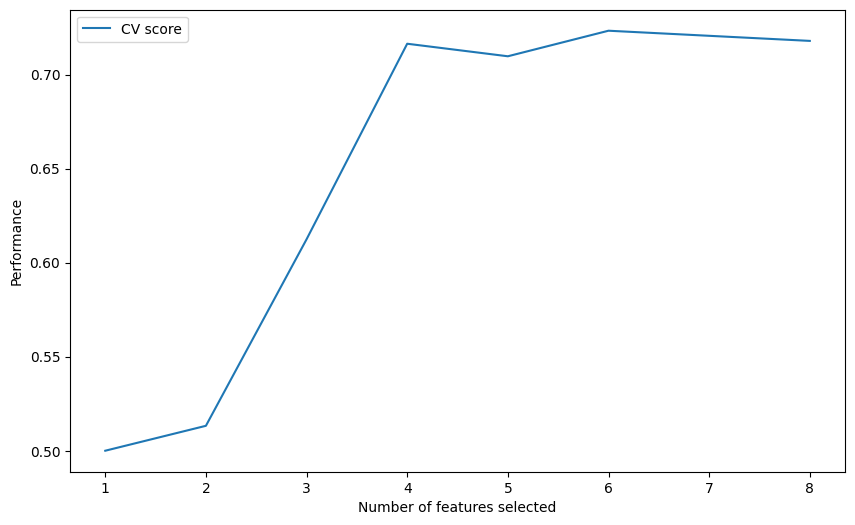

In [114]:
# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

In [117]:
rfecv = RFECV(estimator=svc_lin, step=1, cv=sk, scoring= 'accuracy', n_jobs=-1)
rfecv.fit(x, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
      estimator=SVC(kernel='linear', random_state=10), n_jobs=-1,
      scoring='accuracy')

In [118]:
best_features = x.columns[rfecv.support_]
# print the column names of the selected features
print(best_features)

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')


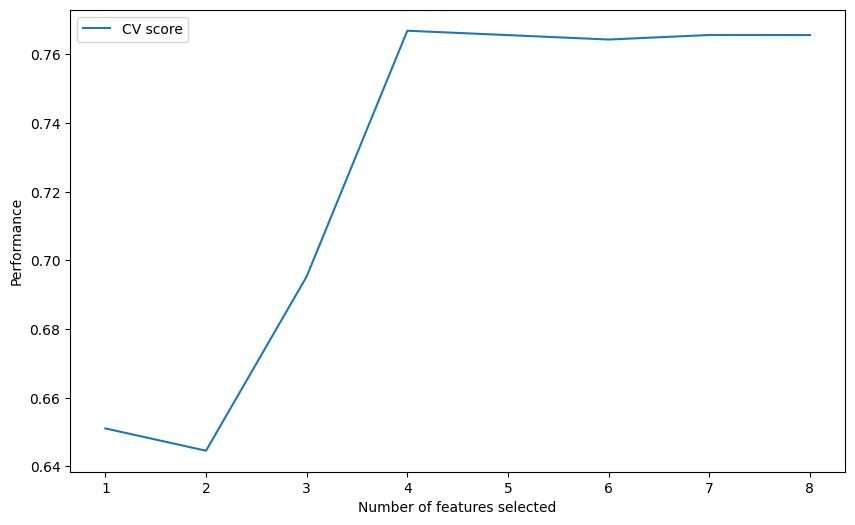

In [119]:
# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()